In [1]:
# Tests for base Horizon functionality: initialization, dumping, visualizations, etc.
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings
import numpy as np

warnings.filterwarnings('ignore')

sys.path.insert(0, '../../../seismiqb')

from seismiqb import Field, Fault

In [2]:
def compare_arrays(a, b):
    return all([(item[0] == item[1]).all() for item in zip(a, b)])

In [3]:
""" You can manage cube and horizon for the test:

CUBE_PATH : str
    Path to an existed seismic cube.
HORIZON_PATH : str
    Path to an existed seismic horizon.
"""
# Tests parameters
OUTPUT_DIR = './fault_test_files'

CUBE_PATH = os.path.join(OUTPUT_DIR, 'test_cube.sgy')
FAULT_PATH = os.path.join(OUTPUT_DIR, 'test_fault')

# Visualization parameters
SCALE = 1
SHOW_FIGURES = True

# Initialization

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 18.8 s, sys: 800 ms, total: 19.6 s
Wall time: 7.02 s


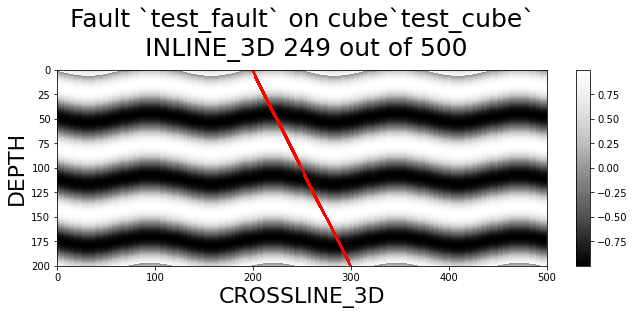

In [4]:
%%time
field = Field(CUBE_PATH)
fault = Fault(FAULT_PATH, field=field)

fault.show(augment_mask=True, centering=False)

In [5]:
%%time
# from_points init
new_fault = Fault(storage=fault.points, field=fault.field, name='tester')

assert (fault.points == new_fault.points).all(), f"`from_points` initialization test failed: original and initialized fault points are unequal"

CPU times: user 8.01 ms, sys: 0 ns, total: 8.01 ms
Wall time: 7.66 ms


In [6]:
%%time
# from_object init
new_fault = Fault(storage={'sticks': fault.sticks}, field=fault.field, name='tester')

assert (fault.points == new_fault.points).all(), f"`from_objects` with 'sticks' initialization test failed: original and initialized fault points are unequal"

CPU times: user 2.91 s, sys: 0 ns, total: 2.91 s
Wall time: 2.91 s


In [7]:
%%time
# from_object init
new_fault = Fault(storage={'sticks': fault.sticks, 'points': fault.points}, field=fault.field, name='tester')

assert (fault.points == new_fault.points).all(), f"`from_objects` with 'sticks' and 'points' initialization test failed: original and initialized fault points are unequal"
assert (fault.sticks == new_fault.sticks), f"`from_objects` with 'sticks' and 'points' initialization test failed: original and initialized fault sticks are unequal"

CPU times: user 4.17 ms, sys: 0 ns, total: 4.17 ms
Wall time: 3.58 ms


# Convertation of storaged

In [8]:
%%time
# from_object init

fault_from_points = Fault(storage={'points': fault.points}, field=fault.field)

assert not fault_from_points.has_component('sticks')
assert not fault_from_points.has_component('nodes')

assert len(fault_from_points.sticks) > 0, f"'sticks' was not created from 'points'"

CPU times: user 483 ms, sys: 40.2 ms, total: 523 ms
Wall time: 523 ms


In [9]:
%%time
# from_object init

fault_from_sticks = Fault(storage={'sticks': fault.sticks}, field=fault.field)

assert not fault_from_sticks.has_component('nodes')
assert not fault_from_sticks.has_component('points')

assert len(fault_from_sticks.nodes) > 0, f"'nodes' was not created from 'sticks'"

CPU times: user 256 µs, sys: 101 µs, total: 357 µs
Wall time: 300 µs


In [10]:
%%time
# from_object init

fault_from_nodes = Fault(storage={'nodes': fault.nodes, 'simplices': fault.simplices}, field=fault.field)

assert not fault_from_nodes.has_component('points')
assert not fault_from_nodes.has_component('sticks')

assert len(fault_from_nodes.points) > 0, f"'points' was not created from 'nodes' and 'simplices'"
assert fault_from_nodes.direction == 0, f"'direction' is not defined"

CPU times: user 2.91 s, sys: 0 ns, total: 2.91 s
Wall time: 2.91 s


# Dump

In [11]:
dump_path_npz = os.path.join(OUTPUT_DIR, 'tmp_fault.npz')

In [12]:
%%time
# dump npz
fault.dump_npz(path=dump_path_npz)

dumped_fault = Fault(storage=dump_path_npz, field=field)

assert (fault.points == dumped_fault.points).all(), f"`dump_npz` test failed: original and dumped 'points' are unequal"
assert compare_arrays(fault.sticks, dumped_fault.sticks), f"`dump_npz` test failed: original and dumped 'sticks' are unequal"
assert (fault.nodes == dumped_fault.nodes).all(), f"`dump_npz` test failed: original and dumped 'nodes' are unequal"
assert (fault.simplices == dumped_fault.simplices).all(), f"`dump_npz` test failed: original and dumped 'simplices' are unequal"
assert (fault.direction == dumped_fault.direction), f"`dump_npz` test failed: original and dumped 'direction' are unequal"

os.remove(dump_path_npz)

CPU times: user 269 ms, sys: 6.31 ms, total: 275 ms
Wall time: 274 ms


In [13]:
dump_path_sticks = os.path.join(OUTPUT_DIR, 'tmp_fault.char')

In [14]:
%%time
# dump fault sticks
fault.dump_fault_sticks(path=dump_path_sticks)

dumped_fault = Fault(storage=dump_path_sticks, field=field)

assert compare_arrays(fault.sticks, dumped_fault.sticks), f"`dump_fault_sticks` test failed: original and dumped 'sticks' are unequal"

os.remove(dump_path_sticks)

CPU times: user 23.5 ms, sys: 9.23 ms, total: 32.7 ms
Wall time: 22.5 ms


# Visualizations

In [15]:
savepath = os.path.join(OUTPUT_DIR, 'tmp_fault_3d.html') 

fault.show_3d(sticks=False, show=False, savepath=savepath)

os.remove(savepath)

In [16]:
fault.show_3d(sticks=True, show=False, savepath=savepath)

os.remove(savepath)

In [17]:
savepath = os.path.join(OUTPUT_DIR, 'tmp_fault_2d.png') 

fault.show(augment_mask=True, show=False, savepath=savepath)

os.remove(savepath)